## Results Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
LOG_FILE = "/Users/phamquangtrung/Desktop/localization-viettel-mini-project/experiments/logs/localization_simulation_results.csv"
OUTPUT_DIR = "/Users/phamquangtrung/Desktop/localization-viettel-mini-project/experiments/analysis_plots"

# Ensure the output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size

In [3]:

# --- Analysis Functions ---

def plot_isolated_noise_effect(data_subset, x_col, x_label, title_prefix, plot_name_prefix, fixed_param_col=None):
    """
    Plots the effect of a single noise variable on localization error,
    across different numbers of anchors.
    """
    if data_subset.empty:
        print(f"No data for {title_prefix}. Skipping plot.")
        return

    # Ensure the x_col is sorted for plotting
    data_subset = data_subset.sort_values(by=x_col)

    plt.figure(figsize=(14, 8))
    
    # Use hue for num_anchors
    sns.lineplot(data=data_subset, x=x_col, y='avg_localization_error_m', hue='num_anchors', marker='o')
    
    plt.title(f'{title_prefix}: Average Localization Error vs. {x_label}')
    plt.xlabel(x_label)
    plt.ylabel('Average Localization Error (m)')
    plt.grid(True)
    plt.legend(title='Num Anchors')
    
    if fixed_param_col:
        fixed_val = data_subset[fixed_param_col].iloc[0] # Get the fixed value
        plt.suptitle(f' (Fixed {fixed_param_col.replace("_m", "")}: {fixed_val:.2f} {fixed_param_col.split("_")[-1] if "_m" in fixed_param_col else ""})', y=1.02, fontsize=12)

    plot_path = os.path.join(OUTPUT_DIR, f'{plot_name_prefix}_avg_error_vs_{x_col}.png')
    plt.savefig(plot_path)
    plt.close()
    print(f"Saved plot: {plot_path}")

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data_subset, x=x_col, y='std_localization_error_m', hue='num_anchors', marker='o')
    plt.title(f'{title_prefix}: Standard Deviation of Localization Error vs. {x_label}')
    plt.xlabel(x_label)
    plt.ylabel('Standard Deviation of Localization Error (m)')
    plt.grid(True)
    plt.legend(title='Num Anchors')

    if fixed_param_col:
        fixed_val = data_subset[fixed_param_col].iloc[0] # Get the fixed value
        plt.suptitle(f' (Fixed {fixed_param_col.replace("_m", "")}: {fixed_val:.2f} {fixed_param_col.split("_")[-1] if "_m" in fixed_param_col else ""})', y=1.02, fontsize=12)

    plot_path = os.path.join(OUTPUT_DIR, f'{plot_name_prefix}_std_error_vs_{x_col}.png')
    plt.savefig(plot_path)
    plt.close()
    print(f"Saved plot: {plot_path}")


def plot_combined_noise_heatmap(data_subset, z_col, title_suffix, plot_name_suffix):
    """
    Plots a heatmap showing the effect of combined noise variations.
    """
    if data_subset.empty:
        print(f"No data for combined noise heatmap '{title_suffix}'. Skipping plot.")
        return

    # Iterate over unique number of anchors for separate heatmaps
    for num_anchors in data_subset['num_anchors'].unique():
        subset_for_heatmap = data_subset[data_subset['num_anchors'] == num_anchors]
        
        if subset_for_heatmap.empty:
            continue

        # Pivot the table for heatmap
        # Index: bearing_noise_std_deg_approx (or kappa), Columns: sigma_gnss_m
        # Values: avg_localization_error_m
        heatmap_data = subset_for_heatmap.pivot_table(
            index='bearing_noise_std_deg_approx',
            columns='sigma_gnss_m',
            values=z_col
        )
        
        # Sort index and columns for consistent plotting order
        heatmap_data = heatmap_data.sort_index(ascending=False).sort_index(axis=1) # Reverse bearing for intuitive high->low noise

        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis_r", linewidths=.5, cbar_kws={'label': f'{z_col.replace("_m", "")} (m)'})
        
        plt.title(f'Localization {title_suffix} (Num Anchors: {num_anchors})')
        plt.xlabel('Anchor GNSS Noise (Sigma_GNSS, m)')
        plt.ylabel('Bearing Noise (Approx Std Dev, deg)')
        
        plot_path = os.path.join(OUTPUT_DIR, f'combined_noise_heatmap_{plot_name_suffix}_{num_anchors}_anchors.png')
        plt.savefig(plot_path)
        plt.close()
        print(f"Saved plot: {plot_path}")

# --- Main Analysis Script ---

In [4]:
# --- Load Data ---
try:
    df = pd.read_csv(LOG_FILE)
    print(f"Successfully loaded data from {LOG_FILE}")
    print("\nDataFrame Head:")
    print(df.head())
    print("\nUnique Experiment Types:")
    print(df['experiment_name'].unique())
except FileNotFoundError:
    print(f"Error: {LOG_FILE} not found. Please run the simulation script first.")
    exit()

df['bearing_noise_std_deg_approx'] = df['bearing_noise_std_deg_approx'].replace([np.inf, -np.inf], np.nan)
df.head()

Successfully loaded data from /Users/phamquangtrung/Desktop/localization-viettel-mini-project/experiments/logs/localization_simulation_results.csv

DataFrame Head:
            experiment_name  \
0  BearingNoise_VaryAnchors   
1  BearingNoise_VaryAnchors   
2  BearingNoise_VaryAnchors   
3  BearingNoise_VaryAnchors   
4  BearingNoise_VaryAnchors   

                              experiment_description  num_anchors  \
0  Fixed Anchor Noise, Varying Bearing Noise & Nu...            5   
1  Fixed Anchor Noise, Varying Bearing Noise & Nu...            5   
2  Fixed Anchor Noise, Varying Bearing Noise & Nu...            5   
3  Fixed Anchor Noise, Varying Bearing Noise & Nu...            5   
4  Fixed Anchor Noise, Varying Bearing Noise & Nu...            5   

   bearing_kappa  bearing_noise_std_deg_approx  sigma_gnss_m  \
0           1000                      1.811852           3.0   
1            500                      2.562345           3.0   
2            200                      4.05

,experiment_name,experiment_description,num_anchors,bearing_kappa,bearing_noise_std_deg_approx,sigma_gnss_m,avg_localization_error_m,std_localization_error_m,n_simulations
0,BearingNoise_VaryAnchors,"Fixed Anchor Noise, Varying Bearing Noise & Nu...",5,1000,1.811852,3.0,27.831447,6.249201,1000
1,BearingNoise_VaryAnchors,"Fixed Anchor Noise, Varying Bearing Noise & Nu...",5,500,2.562345,3.0,10.768752,19.629806,1000
2,BearingNoise_VaryAnchors,"Fixed Anchor Noise, Varying Bearing Noise & Nu...",5,200,4.051423,3.0,13.612771,8.431566,1000
3,BearingNoise_VaryAnchors,"Fixed Anchor Noise, Varying Bearing Noise & Nu...",5,100,5.729578,3.0,27.179464,8.190359,1000
4,BearingNoise_VaryAnchors,"Fixed Anchor Noise, Varying Bearing Noise & Nu...",5,50,8.102847,3.0,46.813535,21.966512,1000



--- Analyzing Isolated Noise Variations ---


KeyError: 'fixed_sigma_gnss_m'

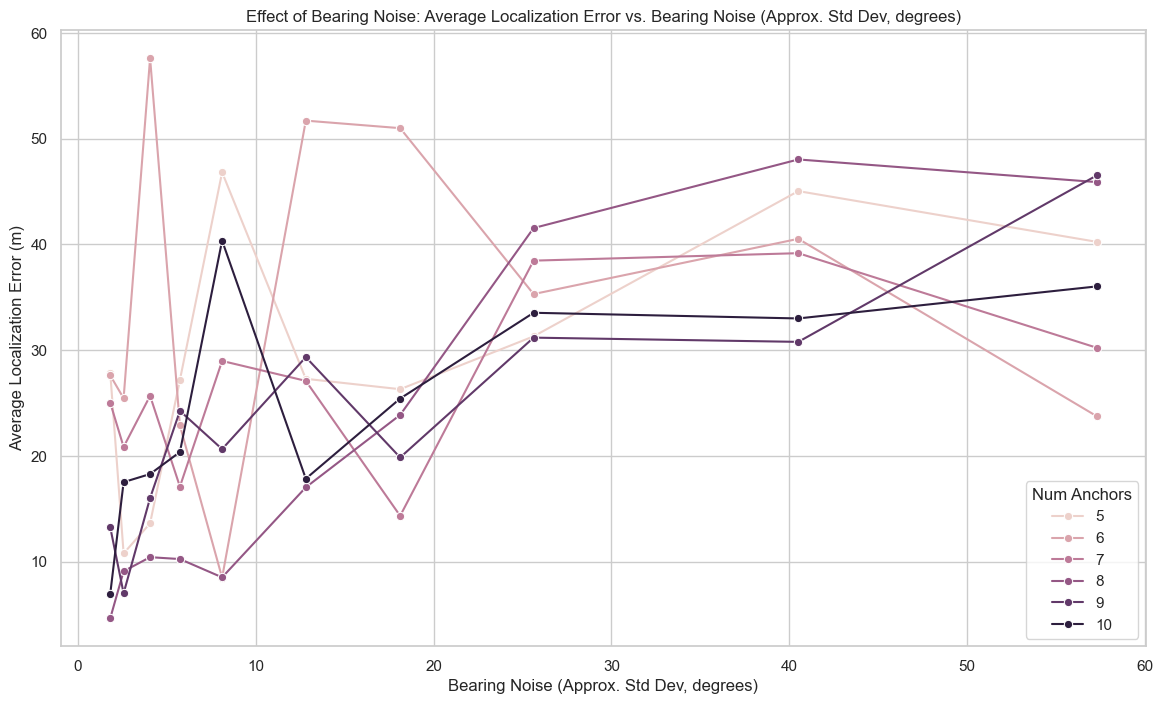

In [6]:

print("\n--- Analyzing Isolated Noise Variations ---")

# Experiment 1: Fixed Anchor Noise, Varying Bearing Noise & Number of Anchors
exp1_df = df[df['experiment_name'] == 'BearingNoise_VaryAnchors'].copy()
# Drop rows where bearing_noise_std_deg_approx is NaN (could happen if kappa=0 or very high)
plot_isolated_noise_effect(
    exp1_df,
    x_col='bearing_noise_std_deg_approx',
    x_label='Bearing Noise (Approx. Std Dev, degrees)',
    title_prefix='Effect of Bearing Noise',
    plot_name_prefix='bearing_noise_isolated',
    fixed_param_col='fixed_sigma_gnss_m' # To show the fixed value in title
)

In [ ]:


# Experiment 2: Fixed Bearing Noise, Varying Anchor Noise & Number of Anchors
exp2_df = df[df['experiment_name'] == 'AnchorNoise_VaryAnchors'].copy()
plot_isolated_noise_effect(
    exp2_df,
    x_col='sigma_gnss_m',
    x_label='Anchor GNSS Noise (Sigma_GNSS, meters)',
    title_prefix='Effect of Anchor Noise',
    plot_name_prefix='anchor_noise_isolated',
    fixed_param_col='bearing_kappa' # To show the fixed value in title
)


print("\n--- Analyzing Combined Noise Variations ---")

# Experiment 3: Combined Noise Variation
exp3_df = df[df['experiment_name'] == 'CombinedNoise_VaryAll'].copy()
exp3_df.dropna(subset=['bearing_noise_std_deg_approx'], inplace=True)

# Plot heatmaps for average error
plot_combined_noise_heatmap(
    exp3_df,
    z_col='avg_localization_error_m',
    title_suffix='Average Localization Error',
    plot_name_suffix='avg_error'
)

# Plot heatmaps for standard deviation of error
plot_combined_noise_heatmap(
    exp3_df,
    z_col='std_localization_error_m',
    title_suffix='Standard Deviation of Localization Error',
    plot_name_suffix='std_error'
)

print(f"\nAnalysis complete. Plots saved to '{OUTPUT_DIR}' directory.")
print("Remember to replace the placeholder solver with your actual ODR solver for meaningful results!")